In [1]:
# reset svih varijabli u okruženju
from IPython import get_ipython
get_ipython().magic('reset -sf')

Procjenjena srednja vrijednost: 49.55
Procjenjena standardna devijacija: 9.87


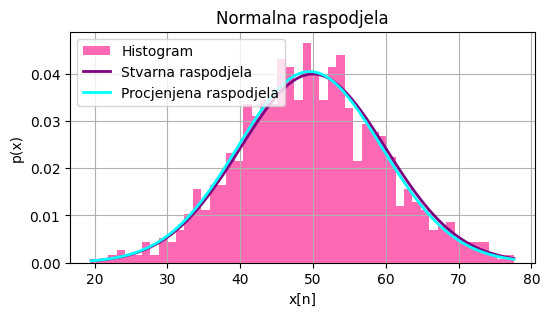

In [ ]:
# ZADATAK 1
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

np.random.seed(0)
n=1000
X=np.random.normal(50, 10, n)

def log_vjerovatnoca(params):
    mi, sigma=params[0], params[1]
    return 0.5*n*np.log(2*np.pi)+n*np.log(sigma)+(1/(2*sigma**2))*np.sum((X-mi)**2)

pocetna_pretpostavka=[np.mean(X), np.std(X)]
rez=minimize(log_vjerovatnoca, pocetna_pretpostavka)
theta=rez.x
print("Procjenjena srednja vrijednost: %.2f\nProcjenjena standardna devijacija: %.2f" % (theta[0], theta[1]))

xmin, xmax=np.min(X), np.max(X)
x=np.linspace(xmin, xmax, 100)
p1=(1/(10*np.sqrt(2*np.pi)))*np.exp(-0.5*((x-50)/10)**2)
p2=(1/(theta[1]*np.sqrt(2*np.pi)))*np.exp(-0.5*((x-theta[0])/theta[1])**2)

plt.figure(figsize=(6, 3))
plt.hist(X, bins=50, density=True, color='hotpink', label='Histogram')
plt.plot(x, p1, linewidth=2, color='purple', label='Stvarna raspodjela')
plt.plot(x, p2, linewidth=2, color='cyan', label='Procjenjena raspodjela')
plt.grid()
plt.title('Normalna raspodjela')
plt.xlabel('x[n]')
plt.ylabel('p(x)')
plt.legend()

from google.colab import files
plt.savefig("z1.png")
files.download("z1.png")

Procjena DC komponente: 5.00


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

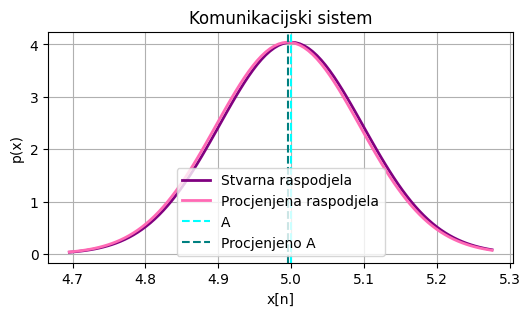

In [ ]:
# ZADATAK 2 - https://www.gaussianwaves.com/2012/10/likelihood-function-and-maximum-likelihood-estimation-mle/
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

np.random.seed(0)
A=5
n=1000
x=A+0.1*np.random.randn(n)
sigma=np.std(x)

def log_vjerovatnoca(mi):
    return 0.5*n*np.log(2*np.pi)+n*np.log(sigma)+(1/(2*sigma**2))*np.sum((x-mi)**2)

pocetna_pretpostavka=[np.mean(x)]
rez=minimize(log_vjerovatnoca, pocetna_pretpostavka)
theta=rez.x
print("Procjena DC komponente: %.2f" % (theta[0]))

xmin, xmax = np.min(x), np.max(x)
x=np.linspace(xmin, xmax, 100)
p1=(1/(sigma*np.sqrt(2*np.pi)))*np.exp(-0.5*((x-A)/sigma)**2)
p2=(1/(sigma*np.sqrt(2*np.pi)))*np.exp(-0.5*((x-theta[0])/sigma)**2)

plt.figure(figsize=(6, 3))
plt.plot(x, p1, linewidth=2, color='purple', label='Stvarna raspodjela')
plt.plot(x, p2, linewidth=2, color='hotpink', label='Procjenjena raspodjela')
plt.axvline(A, color='cyan', linestyle='--', label="A")
plt.axvline(theta[0], color='teal', linestyle='--', label="Procjenjeno A")
plt.grid()
plt.title('Komunikacijski sistem')
plt.xlabel('x[n]')
plt.ylabel('p(x)')
plt.legend()

from google.colab import files
plt.savefig("z23.png")
files.download("z23.png")

Tačnost na testnom skupu podataka:  0.99


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

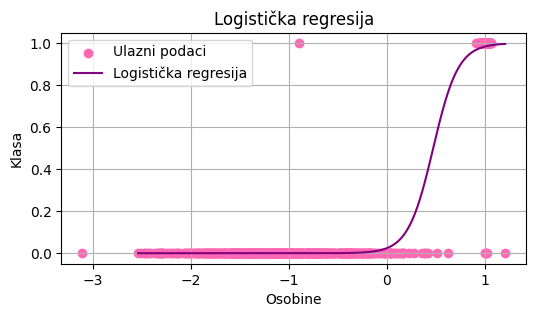

In [ ]:
# ZADATAK 3 - https://learningdaily.dev/understanding-maximum-likelihood-estimation-in-machine-learning-22b915c3e05a
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

n=100
X, Y=make_classification(n_samples=n, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1)
X_trening, X_test, Y_trening, Y_test=train_test_split(X, Y, test_size=0.2, random_state=0)

def log_vjerovatnoca(theta, X, y):
    z=np.dot(X, theta)
    return -np.sum(y*z-np.log(1+np.exp(z)))

theta_pocetno=np.zeros(X_trening.shape[1]+1)
X_modifikovano=np.c_[np.ones(X_trening.shape[0]), X_trening]
rez=minimize(log_vjerovatnoca, theta_pocetno, args=(X_modifikovano, Y_trening))
theta=rez.x

x_modifikovano=np.c_[np.ones(X_test.shape[0]), X_test]
p=1/(1+np.exp(-np.dot(x_modifikovano, theta)))
p=(p>=0.5).astype(int)
tacnost=np.mean(p==Y_test)
print("Tačnost na testnom skupu podataka: ", tacnost)

x=np.linspace(min(X_trening), max(X_trening), n)
x_modifikovano=np.c_[np.ones(x.shape[0]), x]
p=1/(1+np.exp(-np.dot(x_modifikovano, theta)))

plt.figure(figsize=(6, 3))
plt.scatter(X, Y, color='hotpink', label='Ulazni podaci')
plt.plot(x, p, color='purple', label='Logistička regresija')
plt.grid()
plt.xlabel('Osobine')
plt.ylabel('Klasa')
plt.title('Logistička regresija')
plt.legend()

from google.colab import files
plt.savefig("z3.png")
files.download("z3.png")

In [11]:
# ZADATAK 4 - https://python.quantecon.org/mle.html
import numpy as np
from scipy.special import factorial
from statsmodels.api import Poisson

def log_vjerovatnoca(X, y, beta):
    mi=np.exp(np.dot(X, beta))
    return np.sum(y*np.log(mi)-mi-np.log(factorial(y)))

def newton_raphson(X, y, beta_pocetno):
    print(f'{"Iteracija":<13}{"Log-vjerovatnoća":<18}{"θ"}')
    print("-" * 56)

    greska=100
    beta=beta_pocetno.reshape(-1, 1)
    y=y.reshape(X.shape[0], 1)
    i=0
    while np.any(greska>1e-3) and i<1000:
        mi=np.exp(np.dot(X, beta))
        H=-np.dot(X.T, mi*X)
        G=np.dot(X.T, y-mi)

        beta_1=beta-np.dot(np.linalg.inv(H), G)
        greska=np.abs(beta_1-beta)
        beta=beta_1

        print(f'{i:<13}{log_vjerovatnoca(X, y, beta):<18.8}{beta.flatten()}')
        i+=1

    print('Broj iteracija: %d\nβ_hat:' % (i))
    print(beta.flatten())
    return beta.flatten()

X=np.array([[1, 2, 5], [1, 1, 3], [1, 4, 2], [1, 5, 2], [1, 3, 1]])
Y=np.array([1, 0, 1, 1, 0])

beta_pocetno=np.array([0.1, 0.1, 0.1])
newton_raphson(X, Y, beta_pocetno=beta_pocetno)

print("\n")
print(Poisson(Y, X).fit().summary())

Iteracija    Log-vjerovatnoća  θ
--------------------------------------------------------
0            -4.3447622        [-1.48899977  0.26480369  0.24381722]
1            -3.5742413        [-3.3839381   0.52781212  0.47408367]
2            -3.3999526        [-5.0644346   0.78159328  0.70175342]
3            -3.3788646        [-5.91511889  0.90916891  0.82034123]
4            -3.3783559        [-6.07389901  0.93272496  0.84265078]
5            -3.3783555        [-6.07848205  0.93340226  0.84329625]
6            -3.3783555        [-6.07848573  0.9334028   0.84329677]
Broj iteracija: 7
β_hat:
[-6.07848573  0.9334028   0.84329677]


Optimization terminated successfully.
         Current function value: 0.675671
         Iterations 7
                          Poisson Regression Results                          
Dep. Variable:                      y   No. Observations:                    5
Model:                        Poisson   Df Residuals:                        2
Method:                

Optimization terminated successfully.
         Current function value: 2.226090
         Iterations 9
Optimization terminated successfully.
         Current function value: 1.982676
         Iterations 9
Optimization terminated successfully.
         Current function value: 1.954384
         Iterations 9

           Model 1    Model 2    Model 3  
------------------------------------------
const     -29.050*** -19.444*** -20.858***
          (0.638)    (1.668)    (1.742)   
lngdppc   1.084***   0.717***   0.737***  
          (0.035)    (0.083)    (0.084)   
lnpop     1.171***   0.806***   0.929***  
          (0.024)    (0.071)    (0.085)   
gattwto08 0.006***   0.007***   0.004*    
          (0.002)    (0.002)    (0.002)   
lnmcap08             0.399***   0.286***  
                     (0.059)    (0.071)   
rintr                -0.010**   -0.009*   
                     (0.004)    (0.004)   
topint08             -0.051***  -0.058*** 
                     (0.003)    (0.005)   
nrren

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

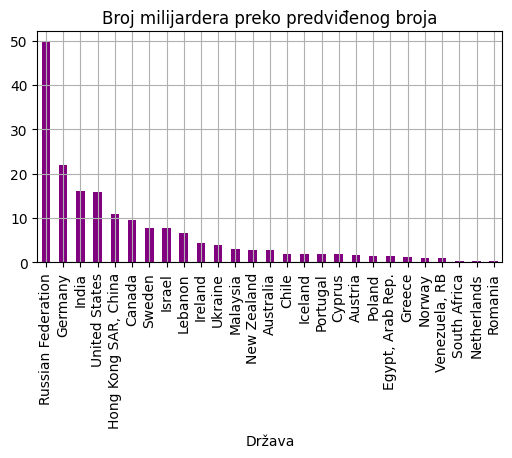

In [41]:
# ZADATAK 5 - https://python.quantecon.org/mle.html
import pandas as pd
from statsmodels.api import Poisson
from statsmodels.iolib.summary2 import summary_col
import matplotlib.pyplot as plt

df=pd.read_stata('https://github.com/QuantEcon/lecture-python/blob/master/source/_static/lecture_specific/mle/fp.dta?raw=true')
df=df[df['year']==2008]
df['const']=1

r1=['const', 'lngdppc', 'lnpop', 'gattwto08']
r2=['const', 'lngdppc', 'lnpop', 'gattwto08', 'lnmcap08', 'rintr', 'topint08']
r3=['const', 'lngdppc', 'lnpop', 'gattwto08', 'lnmcap08', 'rintr', 'topint08', 'nrrents', 'roflaw']
r=[r1, r2, r3]
r_imena=['Model 1', 'Model 2', 'Model 3']

rez=[]
for i in r:
    result=Poisson(df[['numbil0']], df[i], missing='drop').fit()
    rez.append(result)

tabela=summary_col(results=rez, float_format='%0.3f', stars=True, model_names=r_imena)
print(tabela)

data=['const', 'lngdppc', 'lnpop', 'gattwto08', 'lnmcap08', 'rintr', 'topint08', 'nrrents', 'roflaw', 'numbil0', 'country']
rez_poredba=df[data].dropna()

rez_poredba['prediction']=rez[2].predict()
rez_poredba['difference']=rez_poredba['numbil0']-rez_poredba['prediction']

rez_poredba.sort_values('difference', ascending=False, inplace=True)
rez_poredba[:27].plot('country', 'difference', kind='bar', figsize=(6,3), legend=False, color='purple')
plt.grid()
plt.title('Broj milijardera preko predviđenog broja')
plt.xlabel('Država')

prag=1
print('\nUkupan broj država:', rez_poredba['country'].nunique())
print('Razlika > %d: %d' % (prag, (rez_poredba['difference']>prag).sum()))
print('Razlika je ±%d: %d' % (prag, ((rez_poredba['difference']>=-prag) & (rez_poredba['difference']<=prag)).sum()))
print('Razlika < %d: %d' % (prag, (rez_poredba['difference']<prag).sum()))
print('Maksimalna greška: %d' % rez_poredba['difference'].max())
print('Minimalna greška: %d' % rez_poredba['difference'].min())

from google.colab import files
plt.savefig("z5.png")
files.download("z5.png")